In [70]:
from IPython.display import Image

# Co je API?

## Klient a server

API(Application Programming Interface) je dohoda mezi dvěma stranami o tom, jak si mezi sebou budou povídat. Těmto stranám se říká klient a server.

**Server** je ta strana, která má zajímavé informace, nebo něco zajímavého umí, a umožňuje ostatním na internetu, aby toho využili. Server je program, který donekonečna běží na nějakém počítači a je připraven všem ostatním na internetu odpovídat na požadavky.

**Klient** je program, který posílá požadavky na server a z odpovědí se snaží poskládat něco užitečného. Klient je tedy mobilní aplikace s mráčky a sluníčky nebo náš prohlížeč, v němž si můžeme otevřít kurzovní lístek ČNB. Je to ale i Heureka robot, který za Heureku načítá informace o zboží v e-shopech.

![title](giphy.gif)

# Základní pojmy

Než se pustíme do tvorby klienta, projdeme si některé základní pojmy kolem API.

## Protokol

Celé dorozumívání mezi klientem a serverem se odehrává přes tzv. protokol. To není nic jiného, než smluvený způsob, co bude kdo komu posílat a jakou strukturu to bude mít. Protokolů je v počítačovém světě spousta, ale nás bude zajímat jen HTTP, protože ten využívají webová API a ostatně i web samotný. Není to náhoda, že adresa internetových stránek v prohlížeči zpravidla začíná http:// (nebo https://).

### HTTP

Dorozumívání mezi klientem a serverem probíhá formou požadavku (HTTP request), jenž posílá klient na server, a odpovědi (HTTP response), kterou server posílá zpět. Každá z těchto zpráv má své náležitosti.

### Požadavek

+ **metoda** (HTTP method): Například metoda GET má tu vlastnost, že pouze čte a nemůžeme s ní tedy přes API něco změnit - je tzv. bezpečná. Kromě metody GET existují ještě metody POST (vytvořit), PUT (aktualizovat) a DELETE (odstranit), které jsou nad rámec tohoto kurzu.
+ **adresa s parametry** (URL s query parameters):  Na konci běžné URL adresy otazník a za ním parametry. Pokud je parametrů víc, oddělují se znakem &.
        http://api.example.com/movies/
        http://api.example.com/movies?genre=drama&duration=150 
+ **hlavičky** (headers): Hlavičky jsou vlastně jen další parametry. Liší se v tom, že je neposíláme jako součást adresy a na rozdíl od URL parametrů podléhají nějaké standardizaci a konvencím.
+ **tělo** (body): Tělo zprávy je krabice, kterou s požadavkem posíláme, a do které můžeme vložit, co chceme. Tedy nejlépe něco, čemu bude API na druhé straně rozumět. Tělo může být prázdné. V těle můžeme poslat obyčejný text, data v nějakém formátu, ale klidně i obrázek. Aby API na druhé straně vědělo, co v krabici je a jak ji má rozbalovat, je potřeba s tělem zpravidla posílat hlavičku Content-Type.

Musíme vyčíst z dokumentace konkrétního API, jak požadavek správně poskládat.

### Odpověď

+ **status kód** (status code): Číselný kód, kterým API dává najevo, jak požadavek zpracovalo. Podle první číslice kódu se kódy dělí na různé kategorie:
        1xx - informativní odpověď (požadavek byl přijat, ale jeho zpracování pokračuje)
        2xx - požadavek byl v pořádku přijat a zpracován
        3xx - přesměrování, klient potřebuje poslat další požadavek jinam, aby se dobral odpovědi
        4xx - chyba na straně klienta (špatně jsme poskládali dotaz)
        5xx - chyba na straně serveru (API nezvládlo odpovědět)
+ **hlavičky** (headers): Informace o požadavku jako např. datum zpracování, formát odpovědi...
+ **tělo** (body): Tělo odpovědi - to, co nás zajímá většinou nejvíc

### Formáty

Tělo může být v libovolném formátu. Může to být text, HTML, obrázek, PDF soubor, nebo cokoliv jiného.
Hodnotě hlavičky Content-Type se dávají různé názvy: content type, media type, MIME type. 
Nejčastěji se skládá jen z typu a podtypu, které se oddělí lomítkem. Několik příkladů:
+ text/plain - obyčejný text
+ text/html - HTML
+ text/csv - CSV
+ image/gif - GIF obrázek
+ image/jpeg - JPEG obrázek
+ image/png - PNG obrázek
+ application/json - JSON
+ application/xml nebo text/xml - XML


### Formát JSON

JSON vznikl kolem roku 2000 a brzy se uchytil jako stručnější náhrada za XML, především na webu a ve webových API. Dnes je to **nejspíš nejoblíbenější formát pro obecná strukturovaná data vůbec**. Jeho autorem je Douglas Crockford, jeden z lidí podílejících se na vývoji jazyka JavaScript.

#### JSON je datový formát NE datový typ!

Vstupem je libovolná datová struktura:
+ číslo
+ řetězec
+ boolean
+ pole
+ objekt
+ null

Výsutpem je vždy řetězec(string)

![title](null.jpg)

Jazyk Python (a mnoho dalších) má podporu pro práci s JSON v základní instalaci (vestavěný).

V případě jazyka Python si lze JSON splést především se slovníkem (dictionary). Je ale potřeba si uvědomit, že JSON je text, který může být uložený do souboru nebo odeslaný přes HTTP, ale nelze jej přímo použít při programování. Musíme jej vždy nejdříve zpracovat na slovníky a seznamy.

In [71]:
import json

In [72]:
#klíč "people" s polem objektů, které má vlastní klíče
people_info = '''
{
    "people": [
    {
        "name": "John Smith",
        "phone": "555-246-999",
        "email": ["johns@gmail.com", "jsmith@gmail.com"],
        "is_employee": false
    },
    {
        "name": "Jane Doe",
        "phone": "665-296-659",
        "email": ["janed@gmail.com", "djane@gmail.com"],
        "is_employee": true
    }
  ]
}
'''

json.loads převede řetězec na objekt

In [73]:
data = json.loads(people_info)

In [83]:
data

{'people': [{'name': 'John Smith',
   'phone': '555-246-999',
   'email': ['johns@gmail.com', 'jsmith@gmail.com'],
   'is_employee': False},
  {'name': 'Jane Doe',
   'phone': '665-296-659',
   'email': ['janed@gmail.com', 'djane@gmail.com'],
   'is_employee': True}]}

In [84]:
type(data)

dict

In [85]:
type(data['people'])

list

In [77]:
type(data['people'][0])

dict

In [82]:
data['people']

[{'name': 'John Smith',
  'phone': '555-246-999',
  'email': ['johns@gmail.com', 'jsmith@gmail.com'],
  'is_employee': False},
 {'name': 'Jane Doe',
  'phone': '665-296-659',
  'email': ['janed@gmail.com', 'djane@gmail.com'],
  'is_employee': True}]

In [81]:
data['people'][0]

{'name': 'John Smith',
 'phone': '555-246-999',
 'email': ['johns@gmail.com', 'jsmith@gmail.com'],
 'is_employee': False}

In [80]:
data['people'][0]['name']

'John Smith'

# Práce s API klienty

## Obecný klient

Mobilní aplikace na počasí je klient, který někdo vytvořil pro jeden konkrétní úkol a pracovat umí jen s jedním konkrétním API. Takový klient je užitečný, pokud chceme akorát vědět jaké je počasí, ale už méně, pokud si chceme zkoušet práci s více API zároveň. Proto existují obecní klienti.

### Prohlížeč jako obecný klient

Pokud z API chceme pouze číst a API nevyžaduje žádné přihlašování, můžeme jej vyzkoušet i v prohlížeči, jako by to byla webová stránka. Pokud v prohlížeči přejdeme na odkaz Stažení v textovém formátu, uvidíme odpověď z API serveru.

https://www.cnb.cz/cs/financni_trhy/devizovy_trh/kurzy_devizoveho_trhu/denni_kurz.txt

### Obecný klient v příkazové řádce: curl

Pokud se k API budeme potřebovat přihlásit nebo s ním zkoušet dělat složitější věci než jen čtení, nebude nám prohlížeč stačit.

Proto je dobré se naučit používat program curl. Spouští se v příkazové řádce a je to švýcarský nůž všech, kteří se pohybují kolem webových API.

#### Příklady s curl

![title](curl.jpg)

Když příkaz zadáme a spustíme, říkáme tím programu curl, že má poslat požadavek na uvedenou adresu a vypsat to, co mu ČNB pošle zpět.

![title](curl-return.jpg)

## Vlastní klient

Obecného klienta musí ovládat člověk (ruční nastavování parametrů, pravidelné spuštění na základě podmínek či času atd.). To je přesně to, co potřebujeme, když si chceme nějaké API vyzkoušet, ale celý smysl API je v tom, aby je programy mohly využívat automaticky.
Pokud chceme naprogramovat klienta pro konkrétní úkol, můžeme ve většině jazyků použít buď vestavěnou, nebo doinstalovanou knihovnu. V případě jazyka Python použijeme knihovnu Requests.

## Práce s veřejným API
Vyzkoušíme si dotazy na API s daty zločinnosti v UK, která jsou dostupná na měsiční bázi dle přibližné lokace (viz https://data.police.uk/docs/method/stops-at-location/)

In [11]:
import requests

In [12]:
api_url = "https://data.police.uk/api/stops-street"

Nastavení parametrů volání API dle dokumentace https://data.police.uk/docs/method/stops-at-location/
Jako lokaci jsem vybral nechvalně proslulý obvod Hackney v Londýně :)

In [13]:

params = {"lat" : "51.5487158",
          "lng" : "-0.0613842",
          "date" : "2018-06"
    
}

Pomocí get vytvoříme objekt response

In [14]:
response = requests.get(api_url,
                        params = params
)

Pokud je status kód jiný, než 200 (success), vyhodí skript chybu a chybový status code

In [15]:
if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print('First 100 characters of data are')
    print(response.text[:100])

First 100 characters of data are
[{"age_range":"18-24","outcome":"Community resolution","involved_person":true,"self_defined_ethnicit


In [16]:
# hlavička s doplňujícími informacemi o opdovědi
response.headers

{'Date': 'Sun, 19 Jan 2020 18:43:55 GMT', 'Content-Type': 'application/json', 'Content-Length': '5687', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000;', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'DENY', 'Content-Security-Policy': "default-src 'self' 'unsafe-inline' ; script-src 'self' data: www.google-analytics.com ajax.googleapis.com 'unsafe-inline';", 'Referer-Policy': 'strict-origin-when-cross-origin'}

In [17]:
response.headers['content-type']

'application/json'

In [18]:
# obsah odpovědi je řetězec bytů
response.content[:200]

b'[{"age_range":"18-24","outcome":"Community resolution","involved_person":true,"self_defined_ethnicity":"Black\\/African\\/Caribbean\\/Black British - Any other Black\\/African\\/Caribbean background","gend'

Vypadá jako seznam(list) nebo slovník(dictionary), ale nechová se tak

In [19]:
response[0]["age_range"]

TypeError: 'Response' object does not support indexing

Převedeme řetězec bytů metodou .json() z knihovny requests

In [20]:
data = response.json()

Ověříme datový typ

In [21]:
type(data)

list

Nyní můžeme přistupovat k "data" jako ke klasickému seznamu (list)

In [22]:
data[0]["age_range"]

'18-24'

Převední seznamu(list) na řetězec s parametry pro zobrazení struktury v čitelné podobě

In [23]:
datas = json.dumps(data, sort_keys = True, indent = 4)

In [24]:
print(datas[:1600])

[
    {
        "age_range": "18-24",
        "datetime": "2018-06-01T09:45:00+00:00",
        "gender": "Male",
        "involved_person": true,
        "legislation": "Misuse of Drugs Act 1971 (section 23)",
        "location": {
            "latitude": "51.551330",
            "longitude": "-0.068037",
            "street": {
                "id": 968551,
                "name": "On or near Downs Park Road"
            }
        },
        "object_of_search": "Controlled drugs",
        "officer_defined_ethnicity": "Black",
        "operation": false,
        "operation_name": null,
        "outcome": "Community resolution",
        "outcome_linked_to_object_of_search": null,
        "outcome_object": {
            "id": "bu-community-resolution",
            "name": "Community resolution"
        },
        "removal_of_more_than_outer_clothing": null,
        "self_defined_ethnicity": "Black/African/Caribbean/Black British - Any other Black/African/Caribbean background",
        "t

Cyklus, kterým přistupujeme k věkovému rozpětí lidí lustrovaných policií

In [25]:
age_range = []

for i in data:
    age = i["age_range"]
    #print('{}'.format(age))
    age_range.append(age)

In [26]:
#type(data[0])

Cyklus, kterým přistupujeme k id ulice, kde došlo lustraci podezřelé(ho)

In [27]:
street_id = []

for i in data:
    street = i["location"]["street"]["id"]
    #print('{}'.format(street))
    street_id.append(street)
    

In [31]:
import pandas as pd

Spojíme seznamy (lists) do dataframe

In [32]:
df_from_lists = pd.DataFrame(list(zip(age_range, street_id)), 
               columns =['age_range', 'street_id'])

In [33]:
df_from_lists.head()

,age_range,street_id
0,18-24,968551
1,18-24,968830
2,over 34,968830
3,18-24,968740
4,10-17,964026


Jakou věkovou skupinu lustrovala policie nejčastěji?

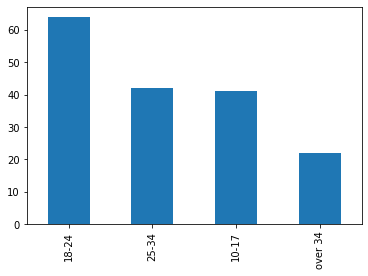

In [64]:
df_from_lists["age_range"].value_counts().plot.bar();

### Json_normalize
aneb jak obejít custom funkce 

Naimportování json_normalize z knihovny pandas

In [35]:
from pandas.io.json import json_normalize

Vytvoření dataframe pomocí json_normalize z knihovny pandas

In [36]:
norm_data = json_normalize(data)

In [37]:
norm_data.head()

,age_range,datetime,gender,involved_person,legislation,location.latitude,location.longitude,location.street.id,location.street.name,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,outcome_linked_to_object_of_search,outcome_object.id,outcome_object.name,removal_of_more_than_outer_clothing,self_defined_ethnicity,type
0,18-24,2018-06-01T09:45:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.551330,-0.068037,968551,On or near Downs Park Road,Controlled drugs,Black,False,None,Community resolution,None,bu-community-resolution,Community resolution,None,Black/African/Caribbean/Black British - Any ot...,Person search
1,18-24,2018-06-02T02:37:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.549626,-0.054738,968830,On or near Dalston Lane,Controlled drugs,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - Any ot...,Person search
2,over 34,2018-06-02T09:45:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.549626,-0.054738,968830,On or near Dalston Lane,Controlled drugs,White,False,None,Arrest,None,bu-arrest,Arrest,None,White - Any other White background,Person search
3,18-24,2018-06-02T10:50:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.550209,-0.051944,968740,On or near Rowe Lane,Controlled drugs,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - African,Person and Vehicle search
4,10-17,2018-06-02T19:30:00+00:00,Female,True,Police and Criminal Evidence Act 1984 (section 1),51.542304,-0.054589,964026,On or near St Thomas'S Square,Offensive weapons,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - Caribbean,Person search


In [38]:
norm_data["gender"].value_counts()

Male      170
Female      9
Name: gender, dtype: int64

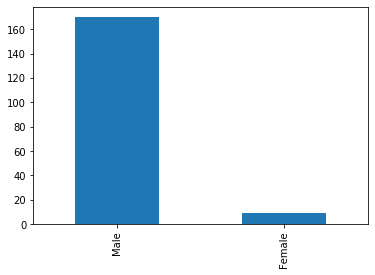

In [62]:
norm_data["gender"].value_counts().plot.bar();

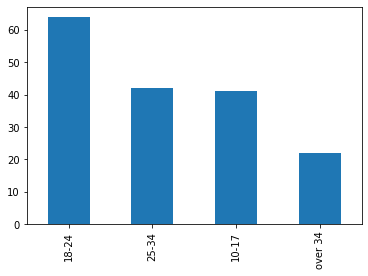

In [63]:
norm_data["age_range"].value_counts().plot.bar();

## Tvoříme klienta pro práci s veřejným API

V následujícím bloku si vytvoříme klienta, který nám stáhne data za dva měsíce (místo jednoho) a uloží je do seznamu seznamů (list of lists). Případné chyby spojení s API ošetříme výjimkami (exceptions) - více viz [dokumentace requests](https://requests.readthedocs.io/en/master/_modules/requests/exceptions/)

In [41]:
dates_list = ["2018-06","2018-07"]
data_list = []
appended_data = []


lat = "51.5487158"
lng = "-0.0613842"

def get_uk_crime_data(latitude, longitude):
    """
    Function loops through a list of dates 
    
    Two arguments latitude and longitude
    
    Returns a dataframe with crime data for each day
    """
    
    for i in dates_list:
        try:
            api_url = "https://data.police.uk/api/stops-street"
            params = {"lat" : latitude,
                      "lng" : longitude,
                      "date" : i
                     }
            response = requests.get(api_url,
                                    params = params
                               )
            data_foo = response.json()
            
            data = json_normalize(data_foo)
            # store DataFrame in list
            appended_data.append(data)
            
        except requests.exceptions.RequestException as e:
            print(e)
            sys.exit(1)
            
       
    return pd.concat(appended_data) #data_list    

In [42]:
#schedule.every(1).minutes.do(get_uk_crime_data,lat,lng)
#while True:
    #schedule.run_pending()
    #time.sleep(1)

Zavolání funkce get_uk_crime_data s parametry zeměpisné šíře a délky přiřazené proměnné df_uk_crime_data

In [43]:
df_uk_crime_data = get_uk_crime_data(lat, lng)

In [44]:
df_uk_crime_data.head()

,age_range,datetime,gender,involved_person,legislation,location.latitude,location.longitude,location.street.id,location.street.name,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,outcome_linked_to_object_of_search,outcome_object.id,outcome_object.name,removal_of_more_than_outer_clothing,self_defined_ethnicity,type
0,18-24,2018-06-01T09:45:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.551330,-0.068037,968551,On or near Downs Park Road,Controlled drugs,Black,False,None,Community resolution,None,bu-community-resolution,Community resolution,None,Black/African/Caribbean/Black British - Any ot...,Person search
1,18-24,2018-06-02T02:37:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.549626,-0.054738,968830,On or near Dalston Lane,Controlled drugs,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - Any ot...,Person search
2,over 34,2018-06-02T09:45:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.549626,-0.054738,968830,On or near Dalston Lane,Controlled drugs,White,False,None,Arrest,None,bu-arrest,Arrest,None,White - Any other White background,Person search
3,18-24,2018-06-02T10:50:00+00:00,Male,True,Misuse of Drugs Act 1971 (section 23),51.550209,-0.051944,968740,On or near Rowe Lane,Controlled drugs,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - African,Person and Vehicle search
4,10-17,2018-06-02T19:30:00+00:00,Female,True,Police and Criminal Evidence Act 1984 (section 1),51.542304,-0.054589,964026,On or near St Thomas'S Square,Offensive weapons,Black,False,None,A no further action disposal,None,bu-no-further-action,A no further action disposal,None,Black/African/Caribbean/Black British - Caribbean,Person search


## Přistupování k tweetům přes Twitter API pomocí knihovny Tweepy

Import knihovny Tweepy

In [49]:
import tweepy

Pro získání dat z Twitteru musí náš klient projít OAuth autorizací.

**Jak funguje OAuth autorizace na Twitteru?**

1. vývojář aplikace se zaregistruje u poskytovatele API
2. zaregistruje aplikaci, získá consumer_key, consumer_secret, access_token a access_secret na https://developer.twitter.com/en/apps
3. aplikace volá API a prokazuje se consumer_key, consumer_secret, access_token a access_secret

In [50]:
consumer_key = "fptJDY5ywDIOtaLQ944tDNOvs"
consumer_secret = "fnJWyryxovVG2AFIkcsAfruBsyv92xCU41cWvWeYYkmCyVGBqn"
access_token = "1646190612-hpeoiAyaLA5qZpiXg7A4YkFkcMjBbcxqexLOsU2"
access_secret = "yLZEwmbEazDgYU655a83LOhWAYGAbWJWefve1JDyLuEBw"

Další krok je vytvoření instance OAuthHandleru, do kterého vložíme náš consumer token a consumer secret

In [51]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

Ověření funkčnosti autentifikace

In [52]:
api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


V API dokumentaci k Tweepy http://docs.tweepy.org/en/v3.5.0/api.html najdeme metodu která např. vypíše ID přátel, reps. sledujících účtu

In [56]:
api.friends_ids('@PREZIDENTmluvci'[:10])

[3282859598, 586671909, 22013178]

Nebo vypíše ID, které účet sleduje

In [57]:
api.followers_ids('@PREZIDENTmluvci'[:10])

[959455966466068482,
 948531199064100865,
 931189123402031105,
 4264604506,
 2331665058,
 2222484193,
 600086746,
 105678846,
 59094476,
 154858427,
 385542230,
 293423711,
 157556621,
 175894896,
 30713065,
 51554943,
 22013178,
 21975928]

Metoda, která vrátí posledních 20 tweetů podle ID uživatele

In [58]:
twitter_user = api.user_timeline('@PREZIDENTmluvci')

In [59]:
for tweet in twitter_user:
    print(tweet.text)
    print("--------")

CELÝ ZÁZNAM rozhovoru pana prezidenta pro Frekvenci 1: Policistovi, který vytáhl 10 lidí z ohně s nasazením života,… https://t.co/WLlcPIZjrI
--------
Právě teď z Lán! Pan prezident na rádiu Frekvence 1 v Prezidentském Press klubu. https://t.co/x1tbSqMPlN
--------
Nezapomeňte, od 18:00 vystoupí pan prezident na Frekvenci 1 v Prezidentském Press klubu! https://t.co/xytKFI4VHz
--------
Pozor, už dnes❗️Pan prezident vystoupí od 18.00 hodin v pořadu Prezidentský Press klub na rádiu 📻Frekvence 1. Rozho… https://t.co/EGrLuBPBh5
--------
Požehnanou neděli, přátelé! https://t.co/HCPnVHnSO6
--------
RT @PaulinkyPraha: https://t.co/AwjxVo4YzJ
--------
Milí přátelé, přeji vám klidnou nadcházející sobotu a požehnanou neděli! https://t.co/3VNWm1tuwI
--------
Prezident republiky Miloš Zeman vystoupí v neděli dne 19. ledna 2020 od 18.00 hodin v pořadu Prezidentský Press klu… https://t.co/SXw2HLt3IB
--------
RT @PremierRP: W #Praga twa sesja plenarna Premierów Państw #GrupaWyszehradzka. #V4 🇵🇱🇨🇿🇭🇺🇸🇰 ht

In [60]:
tweets_list = []
twitter_account = '@PREZIDENTmluvci'

def get_tweets(consumer_key, consumer_secret, access_token, access_secret, twitter_account):
    """
    Function gets the last 20 tweets and adds those not in the list
    
    Five arguments consumer_key, consumer_secret, access_token, access_secret, and twitter_account name
    
    Returns a dataframe with tweets for given account
    """
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)

    try:
        api.verify_credentials()
        print("Authentication OK")
        twitter_user = api.user_timeline(twitter_account)
        
        for tweet in twitter_user:
            #print(tweet.text)
            if tweet.text not in tweets_list:
                tweets_list.append(tweet.text)
                #print(tweets_list)
                
    except:
        print("Error during authentication")
    
    return pd.DataFrame(tweets_list, columns=[twitter_account])

In [61]:
get_tweets(consumer_key, consumer_secret, access_token, access_secret, twitter_account)

Authentication OK


,@PREZIDENTmluvci
0,CELÝ ZÁZNAM rozhovoru pana prezidenta pro Frek...
1,Právě teď z Lán! Pan prezident na rádiu Frekve...
2,"Nezapomeňte, od 18:00 vystoupí pan prezident n..."
3,"Pozor, už dnes❗️Pan prezident vystoupí od 18.0..."
4,"Požehnanou neděli, přátelé! https://t.co/HCPnV..."
5,RT @PaulinkyPraha: https://t.co/AwjxVo4YzJ
6,"Milí přátelé, přeji vám klidnou nadcházející s..."
7,Prezident republiky Miloš Zeman vystoupí v ned...
8,RT @PremierRP: W #Praga twa sesja plenarna Pre...
9,RT @HradOfficial: ★ Dnes si připomínáme Den pa...
